In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
white_image = np.load('C:\\Users\\oryan\\Documents\\PySPAM_Original_Python_MCMC\\notebooks\\images\\Arp_256.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


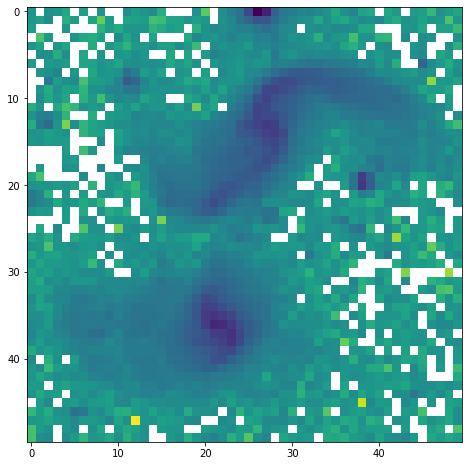

In [5]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(white_image) - 48.6)

In [6]:
def Sigma_Calc(Input_Image):
    # Artificial Cleaning of Input Image
    Noise_Array = 1e-30*np.random.poisson(10,[Input_Image.shape[0],Input_Image.shape[1]])
    Input_Image_Sigma = Input_Image.copy()
    # Input_Image_Sigma += Noise_Array
    
    h = 6.626e-34
    c = 2.998e8
    wavelength = 467.178
        
    Gain = 4.745
    NCOMBINE = 5
    DARK_VARIANCE = 0.81
        
    # Equation pulled from https://pixinsight.com/doc/tools/FluxCalibration/FluxCalibration.html . Need to generalise.
    ADU = 53.907*(np.pi*(2.5e3**2 - 0.625e3**2)/4)*176.672*0.8*Gain*0.6*1*(wavelength/c/h)
    
    Input_Image_ADU = Input_Image_Sigma*ADU
    
    Input_Image_elec = Input_Image_ADU
    
    sky = Noise_Array*ADU
    sky_rms = np.sqrt(np.mean(sky**2))
            
                
    # This equation has come from an SDSS tutorial, found at: http://classic.sdss.org/dr6/algorithms/fluxcal.html
    Sigma_Counts = np.sqrt(Input_Image_elec**2 + (np.sqrt(NCOMBINE)*sky_rms)**2)
                
    Sigma_ADU = Sigma_Counts/(Gain)
        
    Sigma = Sigma_ADU/(ADU)
    
    Sigma = Sigma.astype('float64')
                        
    return Sigma

In [7]:
Sigma_Image = Sigma_Calc(white_image)

In [8]:
disk_image = np.load('C:\\Users\\oryan\\Documents\\chi2-tests\\images\\disk_image_1.npy')
best_image_1 = np.load('C:\\Users\\oryan\\Documents\\chi2-tests\\images\\best_image_1.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


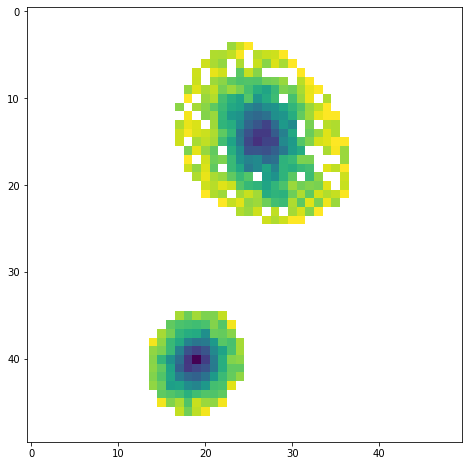

In [9]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(disk_image) - 48.6)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


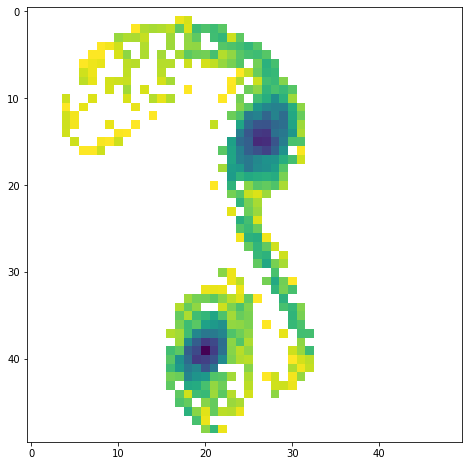

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(best_image_1) - 48.6)

In [12]:
N = white_image.shape[0]*white_image.shape[1]

In [26]:
best_chi = 4*np.pi*np.sum(Sigma_Image) - (1/2)*(1/N)*np.sum((white_image - best_image_1)**2/Sigma_Image**2)

In [21]:
best_chi

-18.21438455169886

In [24]:
disk_chi = 4*np.pi*np.sum(Sigma_Image) - (1/2)*(1/N)*np.sum((white_image - disk_image)**2/Sigma_Image**2)

In [25]:
disk_chi

-48.88164201448177

### Testing Mean Filter

In [17]:
best_int_image = np.zeros(best_image_1.shape)
for i in range(1,best_image_1.shape[0] - 1):
    for j in range(1,best_image_1.shape[1] - 1):
        best_int_image[i,j] = np.mean(best_image_1[i-1:i+1,j-1:j+1])

In [18]:
disk_int_image = np.zeros(disk_image.shape)
for i in range(1,disk_image.shape[0] - 1):
    for j in range(1,disk_image.shape[1] - 1):
        disk_int_image[i,j] = np.mean(disk_image[i-1:i+1,j-1:j+1])

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


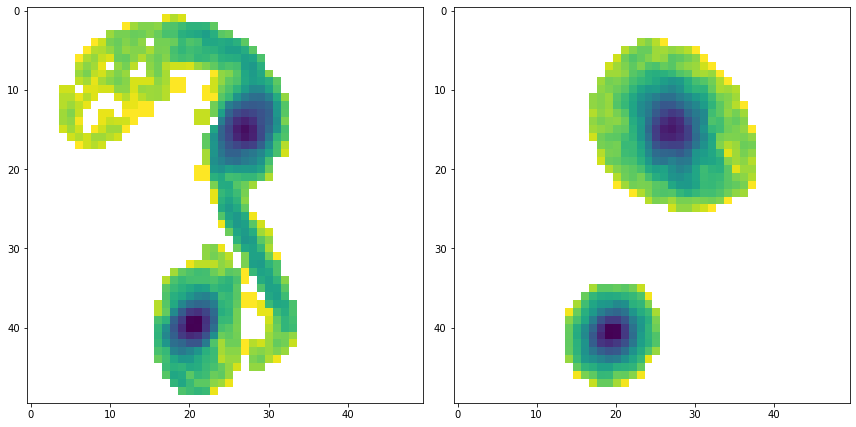

In [19]:
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].imshow(-2.5*np.log10(best_int_image) - 48.6)
axes[1].imshow(-2.5*np.log10(disk_int_image) - 48.6)
figure.tight_layout()

In [17]:
best_chi_int = (1/N)*np.sum((white_image - best_int_image)**2/Sigma_Image**2)
disk_chi_int = (1/N)*np.sum((white_image - disk_int_image)**2/Sigma_Image**2)

In [18]:
print(best_chi_int)
print(disk_chi_int)

23.64229125112583
70.4573640751692


### Testing Greyscaling

In [20]:
white_image_gray = white_image/np.max(white_image)

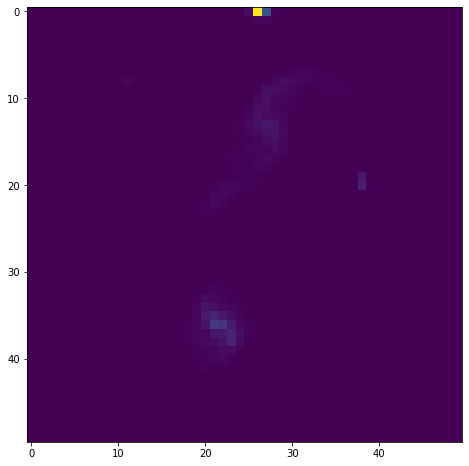

In [23]:
plt.figure(figsize=(12,8))
plt.imshow(white_image_gray)

In [24]:
disk_image_gray = disk_image/np.max(disk_image)

In [28]:
Sigma_Image_gray = Sigma_Image/np.max(Sigma_Image)

In [29]:
disk_chi = (1/N)*np.sum((white_image_gray - disk_image_gray)**2/Sigma_Image_gray**2)

In [30]:
disk_chi

14.694764798763654

In [32]:
best_image_gray = best_image_1/np.max(best_image_1)

In [33]:
best_chi = (1/N)*np.sum((white_image_gray - best_image_gray)**2/Sigma_Image_gray**2)

In [34]:
best_chi

4.60164121077866

### Testing Normalisation with Mean Filter

In [38]:
disk_int_gray_image = np.zeros(disk_image.shape)
for i in range(1,disk_image_gray.shape[0] - 1):
    for j in range(1,disk_image_gray.shape[1] - 1):
        disk_int_gray_image[i,j] = np.mean(disk_image_gray[i-1:i+1,j-1:j+1])

In [39]:
disk_chi = (1/N)*np.sum((white_image_gray - disk_int_gray_image)**2/Sigma_Image_gray**2)

In [40]:
disk_chi

10.464076782906032

In [41]:
best_int_gray_image = np.zeros(disk_image.shape)
for i in range(1,disk_image.shape[0] - 1):
    for j in range(1,disk_image.shape[1] - 1):
        best_int_gray_image[i,j] = np.mean(best_image_gray[i-1:i+1,j-1:j+1])

In [43]:
best_chi = (1/N)*np.sum((white_image_gray - best_int_gray_image)**2/Sigma_Image_gray**2)

In [44]:
best_chi

2.7302700781226252

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


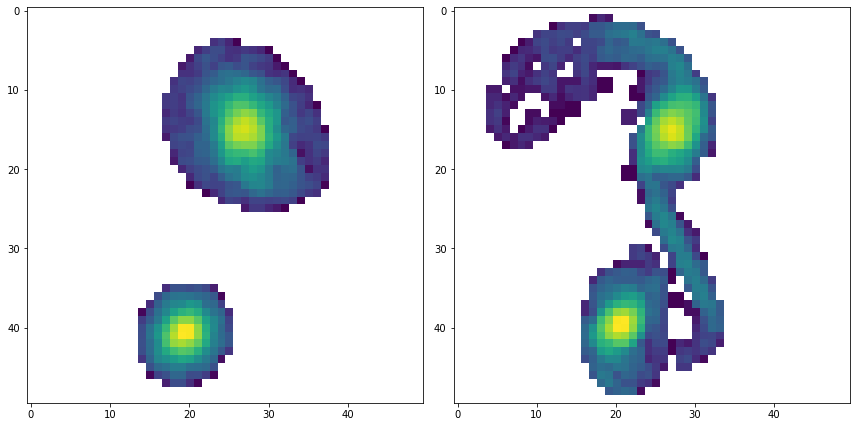

In [57]:
figures,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].imshow(np.log10(disk_int_gray_image))
axes[1].imshow(np.log10(best_int_gray_image))
figures.tight_layout()

### Testing Mean Filter with Normalisation

In [45]:
best_int_image = np.zeros(best_image_1.shape)
for i in range(1,best_image_1.shape[0] - 1):
    for j in range(1,best_image_1.shape[1] - 1):
        best_int_image[i,j] = np.mean(best_image_1[i-1:i+1,j-1:j+1])

In [46]:
disk_int_image = np.zeros(disk_image.shape)
for i in range(1,disk_image.shape[0] - 1):
    for j in range(1,disk_image.shape[1] - 1):
        disk_int_image[i,j] = np.mean(disk_image[i-1:i+1,j-1:j+1])

In [47]:
disk_image_int_gray = disk_int_image/np.max(disk_int_image)

In [48]:
best_image_int_gray = best_int_image/np.max(best_int_image)

In [51]:
best_chi = (1/N)*np.sum((white_image_gray - best_image_int_gray)**2/Sigma_Image_gray**2)

In [52]:
best_chi

18.73935742857029

In [53]:
disk_chi = (1/N)*np.sum((white_image_gray - disk_image_int_gray)**2/Sigma_Image_gray**2)

In [54]:
disk_chi

68.11785991477454

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


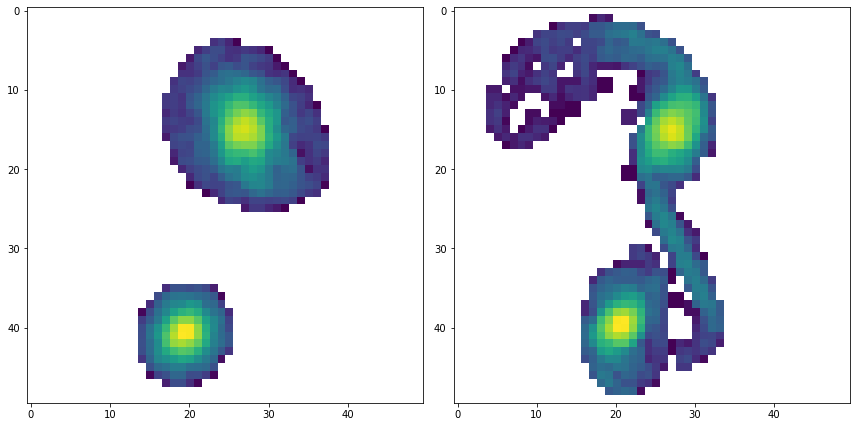

In [58]:
figures,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].imshow(np.log10(disk_image_int_gray))
axes[1].imshow(np.log10(best_image_int_gray))
figures.tight_layout()